# **Calories Burnt Prediction**

**Importing Dependencies**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
from xgboost import XGBRegressor

**Loading Dataset and Dataset Description**

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/exercise.csv")
df.shape

(15000, 8)

In [3]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [4]:
df2 = pd.read_csv("/content/drive/MyDrive/Datasets/calories.csv")
df2.shape

(15000, 2)

In [5]:
df2.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [6]:
df = pd.concat([df, df2['Calories']], axis=1)
df.shape

(15000, 9)

In [7]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [8]:
df.tail()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0
14999,11751526,male,63,173.0,79.0,18.0,92.0,40.5,98.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [10]:
df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


**Data Preprocessing**

In [11]:
df.isnull().sum()

,0
User_ID,0
Gender,0
Age,0
Height,0
Weight,0
Duration,0
Heart_Rate,0
Body_Temp,0
Calories,0


**Data Analysis and Visualization**

In [12]:
sns.set()

<Axes: xlabel='Gender', ylabel='count'>

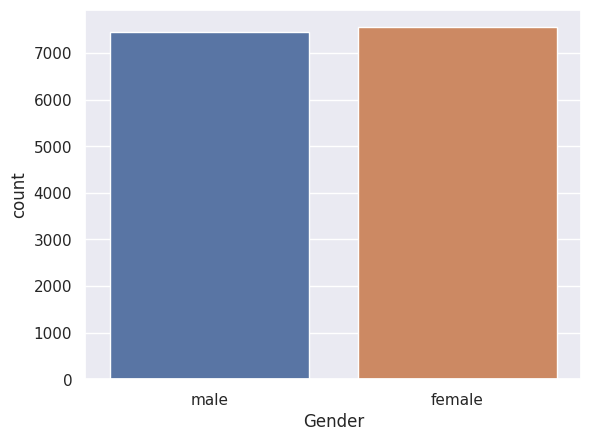

In [13]:
sns.countplot(x='Gender', data=df, hue='Gender')

<Axes: xlabel='Age', ylabel='Count'>

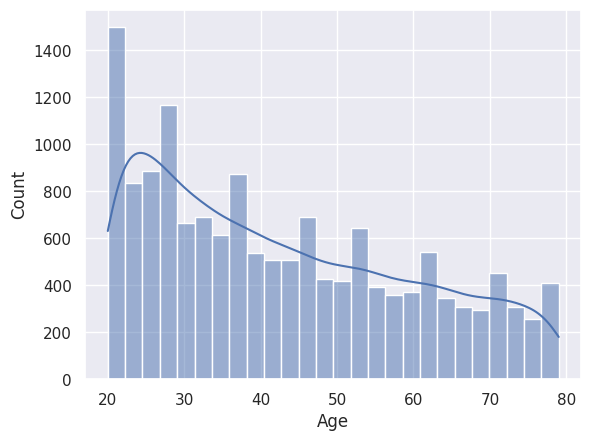

In [14]:
sns.histplot(x='Age', data=df, kde=True)

<Axes: xlabel='Height', ylabel='Count'>

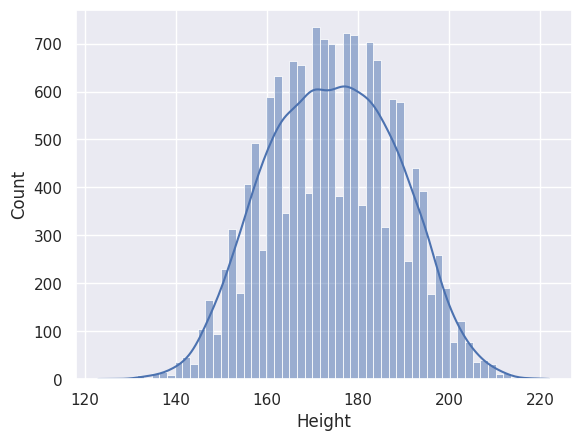

In [15]:
sns.histplot(x='Height', data=df, kde=True)

<Axes: xlabel='Weight', ylabel='Count'>

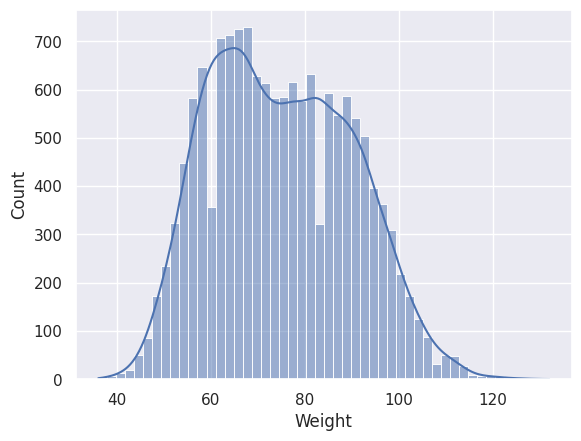

In [16]:
sns.histplot(x='Weight', data=df, kde=True)

<Axes: xlabel='Duration', ylabel='Count'>

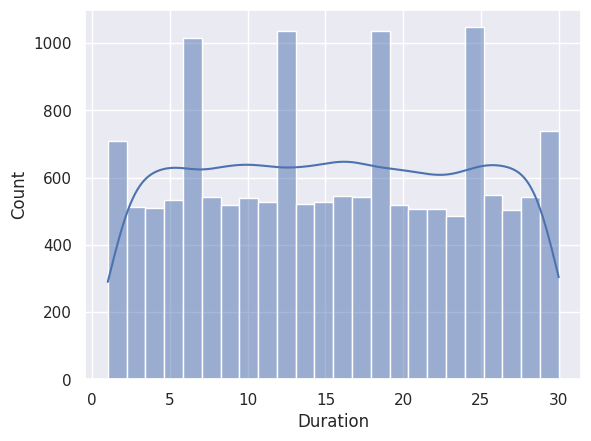

In [17]:
sns.histplot(x='Duration', data=df, kde=True)

<Axes: xlabel='Heart_Rate', ylabel='Count'>

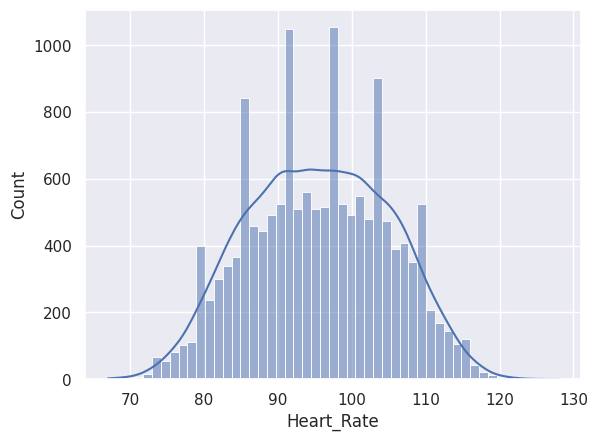

In [18]:
sns.histplot(x='Heart_Rate', data=df, kde=True)

<Axes: xlabel='Body_Temp', ylabel='Count'>

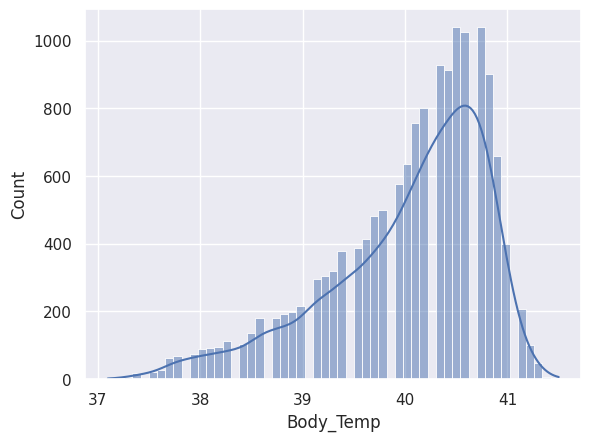

In [19]:
sns.histplot(x='Body_Temp', data=df, kde=True)

In [20]:
df['Gender'] = df['Gender'].map({'male': 0,'female': 1})
df_copy = df.drop(['User_ID'], axis=1)
correlation = df_copy.corr()

<Axes: >

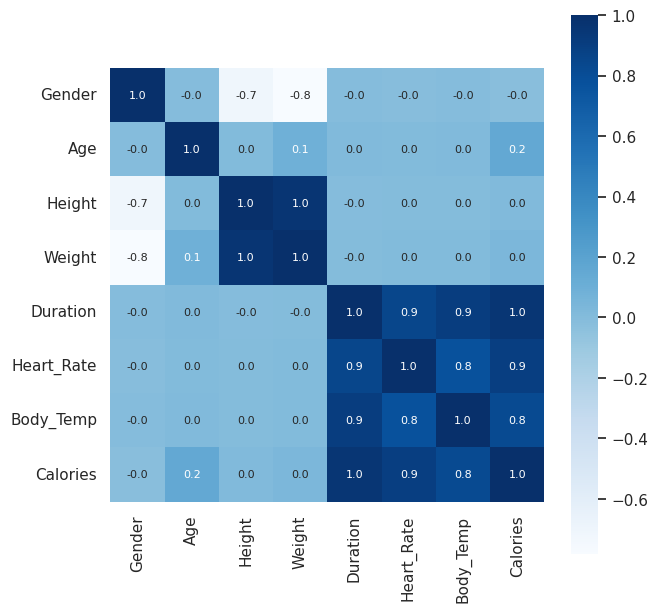

In [21]:
plt.figure(figsize=(7, 7))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

**Splitting Input Features (X) and Output / Target (Y)**

In [22]:
X = df.drop(['User_ID', 'Calories'], axis=1)
Y = df['Calories']

**Training Testing Dataset Splitting**

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=23)

In [24]:
print(X.shape, X_train.shape, X_test.shape)

(15000, 7) (12000, 7) (3000, 7)


**Model Training**

In [25]:
regressor = XGBRegressor()

In [26]:
regressor.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

**Model Accuracy Evaluation on Training Dataset**

In [27]:
Y_train_pred = regressor.predict(X_train)
r2_train_score = r2_score(Y_train, Y_train_pred)
mae_train_score = mean_absolute_error(Y_train, Y_train_pred)
print(f"R2 Score on Training Dataset: {r2_train_score}")
print(f"Mean Absolute Error on Training Dataset: {mae_train_score}")

R2 Score on Training Dataset: 0.999576115026799
Mean Absolute Error on Training Dataset: 0.9421583047906558


**Model Accuracy Evaluation on Testing Dataset**

In [28]:
Y_test_pred = regressor.predict(X_test)
r2_test_score = r2_score(Y_test, Y_test_pred)
mae_test_score = mean_absolute_error(Y_test, Y_test_pred)
print(f"R2 Score on Testing Dataset: {r2_test_score}")
print(f"Mean Absolute Error on Testing Dataset: {mae_test_score}")

R2 Score on Testing Dataset: 0.9988390649963494
Mean Absolute Error on Testing Dataset: 1.4495024241705736


**Making a Predictive System**

In [29]:
input_data = (0,44,184.0,86.0,25.0,114.0,40.8)
input_data = np.asarray(input_data)
input_data = input_data.reshape(1,-1)

prediction = regressor.predict(input_data)
print(f"Calories Burnt: {prediction}")

Calories Burnt: [200.87553]
